<a href="https://colab.research.google.com/github/A-Hoshor/MLA_ADH/blob/main/MLA5_ADH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem One

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

###1. Imports for specific models

In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

###2. Acquire Data

In [ ]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

###3. Statistics and Visual Exploration

In [ ]:
land_type =landsat_train.land_type.groupby(landsat_train.land_type).count()

<Axes: ylabel='land_type'>

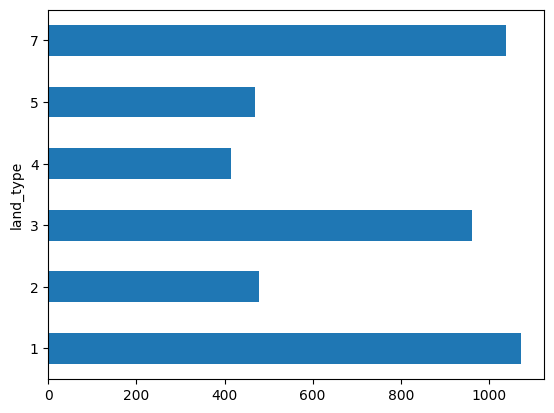

In [ ]:
land_type.plot(kind='barh')

In [ ]:
land_type_test = landsat_test.land_type.groupby(landsat_test.land_type).count()

<Axes: ylabel='land_type'>

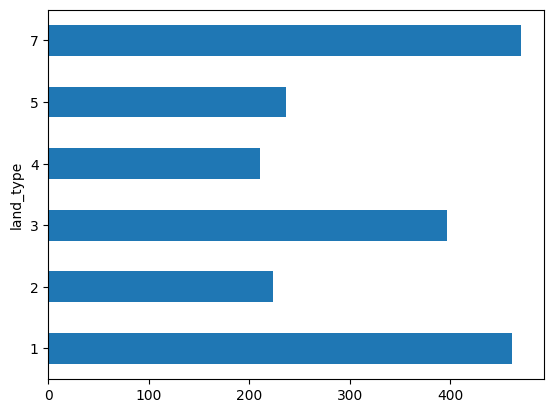

In [ ]:
land_type_test.plot(kind='barh')

###4. Splitting Data into Train/Test

In [ ]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [ ]:
X_train = landsat_train.drop('land_type', axis=1)

In [ ]:
X_test = landsat_test.drop('land_type', axis=1)

In [ ]:
y_train = landsat_train[['land_type']]

In [ ]:
y_test = landsat_test[['land_type']]

In [ ]:
X_train

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra1,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,108,92,66,83,108,96,66,87,104,89
4431,64,71,108,96,68,75,108,96,71,87,...,108,96,66,87,104,89,63,87,104,89
4432,68,75,108,96,71,87,108,88,71,91,...,104,89,63,87,104,89,70,100,104,85
4433,71,87,108,88,71,91,100,81,76,95,...,104,89,70,100,104,85,70,91,104,85


###5. Building the Pipeline

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [8]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
print(X_train.columns.tolist())

['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2', 'top_middle_r', 'top_middle_g', 'top_middle_infra1', 'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1', 'top_right_infra2', 'middle_left_r', 'middle_left_g', 'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r', 'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2', 'middle_right_r', 'middle_right_g', 'middle_right_infra1', 'middle_right_infra2', 'bottom_left_r', 'bottom_left_g', 'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r', 'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2', 'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1', 'bottom_right_infra2']


In [ ]:
num_attribs = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2', 'top_middle_r', 'top_middle_g', 'top_middle_infra1', 'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1', 'top_right_infra2', 'middle_left_r', 'middle_left_g', 'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r', 'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2', 'middle_right_r', 'middle_right_g', 'middle_right_infra1', 'middle_right_infra2', 'bottom_left_r', 'bottom_left_g', 'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r', 'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2', 'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1', 'bottom_right_infra2']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                 ('num',MinMaxScaler(), num_attribs)],
                                  remainder='passthrough')

In [ ]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=4435, bootstrap=True, n_jobs=-1))
                     ])

###6. Executing the Model

In [ ]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=4435, n_estimators=1000,
                                        n_jobs=-1))])

###7. Evaluating the Model

In [ ]:
y_pred = random_forest.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.98      0.98      0.98       224
           3       0.89      0.95      0.92       397
           4       0.79      0.64      0.71       211
           5       0.92      0.91      0.91       237
           7       0.87      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



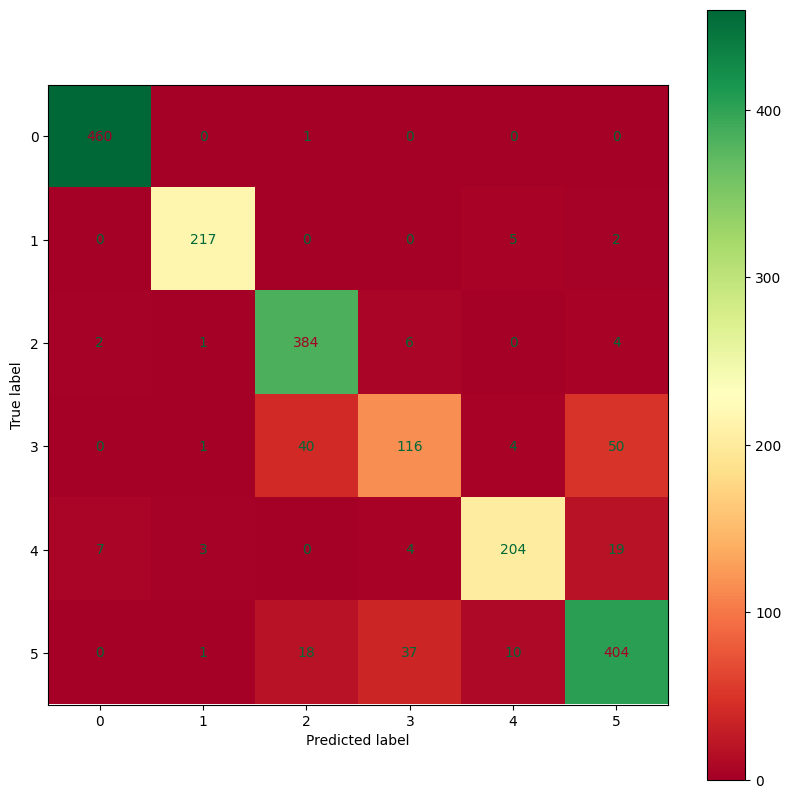

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='RdYlGn')

###8. Conclusion

####This model is great at predicting land types 1 and 2. It is pretty good at predicting land type 3, 5 and 7. It is not that great at predicting land type 4. Over all, this model is pretty good, however that may vary if you care about predicting a certain type of land type over another.

##Problem Two

####Voting Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=100000)
svc = SVC(kernel='rbf')

In [ ]:
voting = Pipeline([
    ('transform', col_transform),
    ('voting_ensemble', VotingClassifier(
        estimators=[
            ('knn', knn),
            ('lr', lr),
            ('svc', svc),
        ], voting='hard'
    ))
])

In [ ]:
voting.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('voting_ensemble',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=100000)),
                                              ('svc', SVC())]))])

In [ ]:
y_pred = voting.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.87      0.97      0.91       397
           4       0.71      0.55      0.62       211
           5       0.91      0.86      0.89       237
           7       0.84      0.86      0.85       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



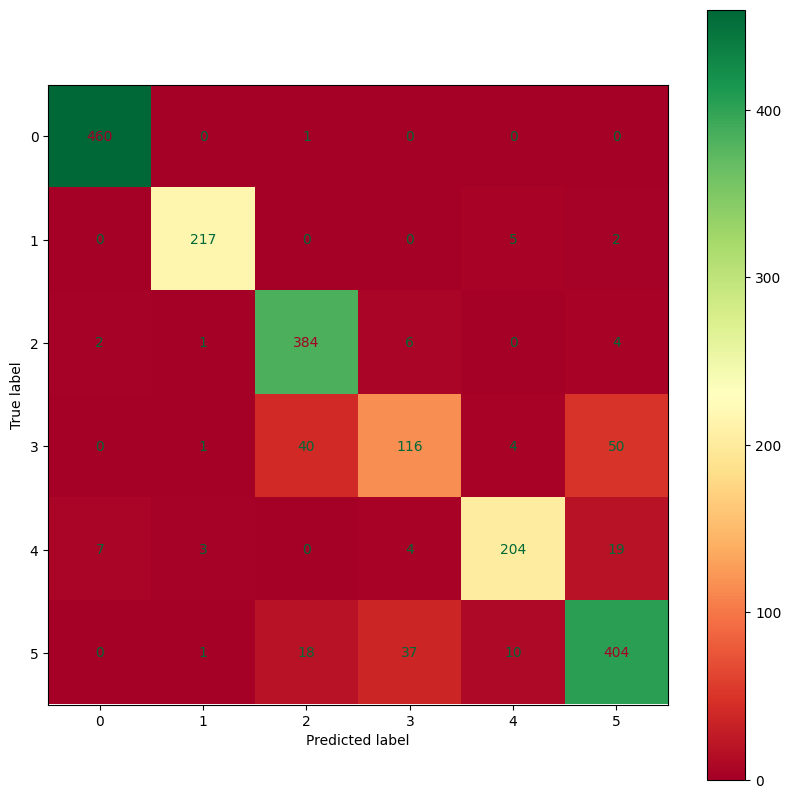

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='RdYlGn')

##Problem Three

In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [11]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']]

In [12]:
y = df[['forgery']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.20, random_state=0)

In [16]:
scaler = MinMaxScaler()

In [18]:
num_attribs = ['entropy', 'curtosis', 'skewness', 'variance']

In [19]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)
])

In [22]:
random_forest = Pipeline([
                     ('transform', col_transform),
                     ('rf',RandomForestClassifier(n_estimators=1000, max_samples=1097, bootstrap=True, n_jobs=-1))
                     ])

In [23]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['entropy', 'curtosis',
                                                   'skewness', 'variance'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1097, n_estimators=1000,
                                        n_jobs=-1))])

In [25]:
y_pred = random_forest.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.98      0.98       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



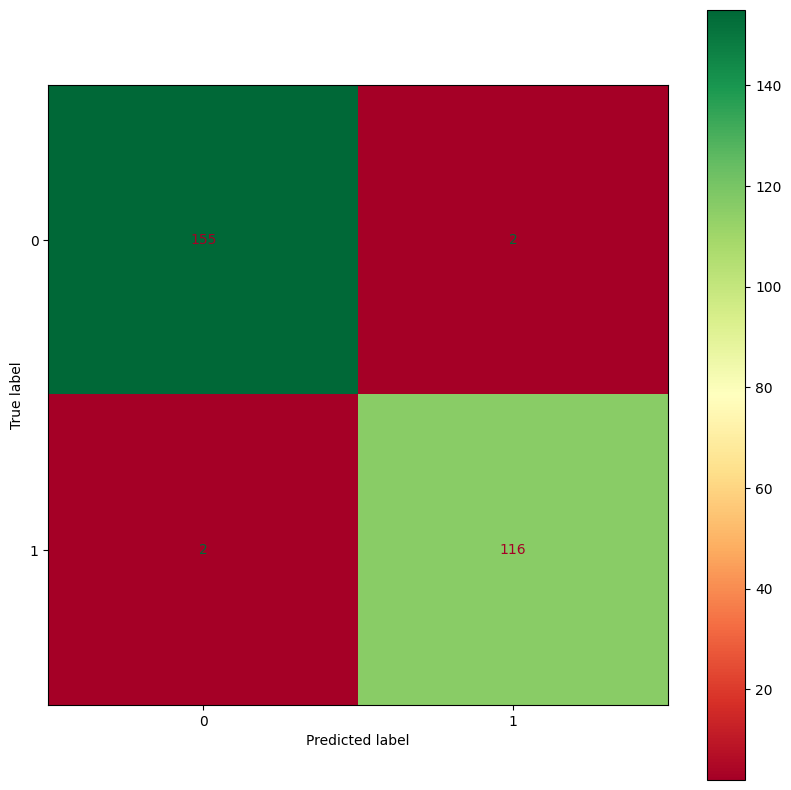

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='RdYlGn')